In [1]:
import d2lzh as d2l
from mxnet import init,autograd,nd,gluon
from mxnet.gluon import nn,data as gdata,loss as gloss

In [2]:
def vgg_block(num_convs,num_channels):
    blk = nn.Sequential()
    for _ in range(num_convs):
        blk.add(nn.Conv2D(num_channels,kernel_size=3,padding=1,activation='relu'))
    blk.add(nn.MaxPool2D(pool_size=2,strides=2))
    return blk

In [3]:
conv_arch = ((1,64),(1,128),(2,256),(2,512),(2,512))

In [4]:
def vgg(conv_arch):
    net = nn.Sequential()
    #卷积层部分
    for (num_convs,num_channels) in conv_arch:
        net.add(vgg_block(num_convs,num_channels))
    #全连接层部分
    net.add(nn.Dense(4096,activation='relu'),
            nn.Dropout(0.5),
            nn.Dense(4096,activation='relu'),
            nn.Dropout(0.5),
            nn.Dense(10)
            )
    return net

In [5]:
net = vgg(conv_arch)
net.initialize()
X = nd.random.uniform(shape=(1,1,224,224))
for blk in net:
    X = blk(X)
    print(blk.name,"output shape:\t",X.shape)

sequential1 output shape:	 (1, 64, 112, 112)
sequential2 output shape:	 (1, 128, 56, 56)
sequential3 output shape:	 (1, 256, 28, 28)
sequential4 output shape:	 (1, 512, 14, 14)
sequential5 output shape:	 (1, 512, 7, 7)
dense0 output shape:	 (1, 4096)
dropout0 output shape:	 (1, 4096)
dense1 output shape:	 (1, 4096)
dropout1 output shape:	 (1, 4096)
dense2 output shape:	 (1, 10)


In [6]:
ratio = 8
small_conv_arch = [(pair[0],pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

In [7]:
lr,num_epochs,batch_size,ctx = 0.05,5,128,d2l.try_gpu()
net.initialize(force_reinit=True,ctx=ctx,init=init.Xavier())
trainer = gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':lr})
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)
d2l.train_ch5(net,train_iter,test_iter,batch_size,trainer,ctx,num_epochs)

training on gpu(0)
epoch 1, loss 0.8081, train acc 0.706, test acc 0.836, time 187.6 sec
epoch 2, loss 0.4064, train acc 0.851, test acc 0.886, time 181.8 sec
epoch 3, loss 0.3332, train acc 0.878, test acc 0.891, time 182.9 sec
epoch 4, loss 0.2940, train acc 0.895, test acc 0.901, time 181.9 sec
epoch 5, loss 0.2687, train acc 0.901, test acc 0.909, time 181.7 sec


In [26]:
import mxnet as mx
def show():
    for X,y in tes_iter:
        X = X.as_in_context(ctx)
        y = y.as_in_context(ctx).
        break
    true_labels = d2l.get_fashion_mnist_labels(y.asnumpy())
    pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
    titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]
    d2l.show_fashion_mnist(X[0:9], titles[0:9])

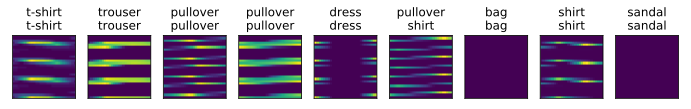

In [27]:
show()